## 1. Gathering data:

In [255]:
import pandas as pd 
import requests 
import numpy as np 


#read first table of enhanced archive data
df1 = pd.read_csv('twitter-archive-enhanced.csv')

#read second table containing image predictions from a neural network algorithm
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('Image_predictions.tsv', 'w') as f:
    f.write(response.text)

df2 = pd.read_table('Image_predictions.tsv')



In [256]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [257]:
#above code (provided by instructor) was run, but following error was given:
#AttributeError: module 'tweepy' has no attribute 'TweepError'

In [258]:
# Using the final file provided by instrucor as neither mobile verification nor did the instructor provided code run. 

#instructor provided code of API call to generate a JSOn file gave error of: 
#AttributeError: module 'tweepy' has no attribute 'TweepError'
#tried solving this syntax issue with other Error inputs, but didnt work. So, used the final file provided by the instructor
#to read the JSON file splitted by rows, and convert it into Dataframe

import json

url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

# Make sure the request was successful before trying to access the content
if response.status_code != 200:
    print(f'Error: {response.status_code}')
else:
    json_data = []
    for line in response.text.split('\n'):
        try:
            json_data.append(json.loads(line))
        except json.decoder.JSONDecodeError:
            pass
    df3 = pd.json_normalize(json_data)
    



In [259]:
list(df.columns)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'entities.hashtags',
 'entities.symbols',
 'entities.user_mentions',
 'entities.urls',
 'entities.media',
 'extended_entities.media',
 'user.id',
 'user.id_str',
 'user.name',
 'user.screen_name',
 'user.location',
 'user.description',
 'user.url',
 'user.entities.url.urls',
 'user.entities.description.urls',
 'user.protected',
 'user.followers_count',
 'user.friends_count',
 'user.listed_count',
 'user.created_at',
 'user.favourites_count',
 'user.utc_offset',
 'user.time_zone',
 'user.geo_enabled',
 'user.verified',
 'user.statuses_count',
 'user.lang',
 'us

In [260]:
# #keeping only 3 relevant columns 

df3 = df3[["id", "retweet_count", "favorite_count" ]]

### 2. Viewing data to Assess:

In [261]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [262]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [263]:
df3

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [264]:


#Saving all 3 dataframes, downloading it on local system for visual assessment on Excel. 

df1.to_csv('DF1.csv')
df2.to_csv('DF2.csv')
df3.to_csv('DF3.csv')


In [265]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [266]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [267]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [268]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [269]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [270]:
df3.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


## Tidiness Issues:
### DF1: 
1. First law of tidines, i.e., each column must represent an observation is violated. Rather than having 4 columns of dog stages, we can have just One column named "dog stage" and fill it with relevant values. (Visual assessment)
2. a. There are enteries which are actually retweets or replies to a previous tweet. b. This is also irrelavnt data column for our analysis purpose, hence is a tidiness issue. 

## Quality issues:

### DF1: 

3. rating_numerator column contain typos, as there are numbers <10 as well as numbers as high as 1776. 
4. rating_denominator has inaccurate data (includes 0 as well as 170). 
5. The 'name' column has missing values as 'None' (may or may not be because name is not provided in the tweet)and has inaacurate mapping as well. Both of these issues are concerned with the same problem: Invalid values in the name column.
6. 'expanded_urls' column have missing values (although maybe not important for our analysis hence redundant column). (Programmatic)
7. In a few cases, 1 dog has been mapped to multiple dog_stages.
8. datatype of timestamp column is not datetime. 



### DF2: 
9. We expect the resuls of neural network to predict the breed of a dog, whereas, for column p1_dog we have 'False' values as well. Data Validation issue. (Visual)
10. img_num column have inaccurate datapoints, as it should always be 1 but contains 4 as well. (Programmatic)

### DF3: 
11. Favourite_count column has value of 0 where retweet_count has number in thousands. This seems to error in data / missing values and would hamper our analyses. (visual)


Note: I have cleaned only 8 of these issues, to meet the requirements. 

### 3. Data Cleaning

In [271]:
# creating copies of the original data:

df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()

#### Removing the datapoints of retweet and replies, as they're not our datapoints of concern.  

##### Define: 
Issue 2a:
Removing the datapoints, from df1_copy, of retweet and replies, as they're not our datapoints of concern. Will use isna() method for this. 

##### Code:

In [272]:
df1_copy = df1_copy[df1_copy['in_reply_to_status_id'].isna() & df1_copy['retweeted_status_id'].isna()]

### Test: 

In [273]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Removing the irrelevant columns to make our dataset cleaner

#### Define: 
Issue 2b: Will remove irrelevant columns like in_reply_to_status_id, retweeted_status_id, etc. to make table cleaner. Will use .drop() method for this. 

##### Code:

In [274]:
df1_copy = df1_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)
df1_copy = df1_copy.reset_index(drop = True)



In [275]:
df1_copy = df1_copy.reset_index(drop=True)

##### Test:

In [276]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 196.7+ KB


##### Define: 
issue 1: Creating a single column for "Dog_stage" rather than having 4 different columns in the dable d1_copy

In [277]:
#Checking if a dog has been tagged to multiple stages somwhow

count = []
for x in range(len(df1_copy)):
    i = 0
    
    for stage in ['doggo', 'floofer', 'pupper', 'puppo']: 
        
        if df1_copy.loc[x, stage] != 'None':
            i = i+1
    count.append(i)
    
duplicated = len([x for x in count if x>1])
print(duplicated)



11


##### result show that at 11 instances, where a dog has been tagged onto 2 stages. 
Since these instances are small in number, and while keeping things simple, I'd take the final stage of a dog as 
the column that appears first with non-None value. 

##### Code:

In [278]:
dog_stage = []

for x in range(len(df1_copy)):
    i = 0
    for stage in ['doggo', 'floofer', 'pupper', 'puppo']: 
        if df1_copy.loc[x, stage] != 'None':
            dog_stage.append(stage)
            i = i+1
            break
    if i == 0:
        dog_stage.append('None')
        
df1_copy["dog_stage"] = dog_stage


In [279]:
df1_copy = df1_copy.drop(['source', 'doggo', 'floofer', 'pupper', 'puppo'], axis = 1)  
#deleting source column as well since I forgot to delete it earlier. 

##### Test:

In [280]:
df1_copy.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


##### Define: 
Issue 8: Changing the datatype of timestamp column

##### Code:

In [281]:
df1_copy['timestamp'] = df1['timestamp']
df1_copy['timestamp'] = pd.to_datetime(df1_copy['timestamp'])


In [282]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   expanded_urls       2094 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   dog_stage           2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 131.2+ KB


##### define:

Issue 4: Rating denominator should always be 10. 

##### Code:

In [283]:
df1_copy["rating_denominator"] = 10 


##### Test:

In [284]:
df1_copy.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.097000e+03,2097.000000,2097.0
mean,7.365594e+17,12.189318,10.0
std,6.710178e+16,40.364996,0.0
min,6.660209e+17,0.000000,10.0
25%,6.768197e+17,10.000000,10.0
50%,7.098528e+17,11.000000,10.0
75%,7.877176e+17,12.000000,10.0
max,8.924206e+17,1776.000000,10.0


##### Define:

Issue 3: Rating_numerator should be >10 and typically <20. Will impute 12 for these records. 

##### Code:

In [285]:
df1_copy.loc[(df1_copy["rating_numerator"] <= 10) | (df1_copy["rating_numerator"] > 20), "rating_numerator"] = 12


##### Test:

In [286]:
df1_copy.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.097000e+03,2097.000000,2097.0
mean,7.365594e+17,11.976156,10.0
std,6.710178e+16,0.637118,0.0
min,6.660209e+17,11.000000,10.0
25%,6.768197e+17,12.000000,10.0
50%,7.098528e+17,12.000000,10.0
75%,7.877176e+17,12.000000,10.0
max,8.924206e+17,14.000000,10.0


##### Hypothesis: 
The tweet_id should be same as number after 'share/' in urls. 

In [287]:
df1_copy['substrings'] = df1_copy['expanded_urls'].str.split('/', expand=False)

In [288]:
df1_copy['substrings'].head()

0    [https:, , twitter.com, dog_rates, status, 892...
1    [https:, , twitter.com, dog_rates, status, 892...
2    [https:, , twitter.com, dog_rates, status, 891...
3    [https:, , twitter.com, dog_rates, status, 891...
4    [https:, , twitter.com, dog_rates, status, 891...
Name: substrings, dtype: object

In [289]:
df1_copy.loc[df1_copy['substrings'].notnull(), 'ids_derived'] = df1_copy.loc[df1_copy['substrings'].notnull()]['substrings'].apply(lambda x: x[x.index('status')+1] if 'status' in x else None)


In [290]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   expanded_urls       2094 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   dog_stage           2097 non-null   object             
 8   substrings          2094 non-null   object             
 9   ids_derived         2000 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 164.0+ KB


In [291]:
df1_copy["ids_derived"].sample(50)

214     841680585030541313
765     750056684286914561
1947    668641109086707712
1235    695051054296211456
601                   None
1028    711694788429553666
167     852553447878664193
635     769940425801170949
1559    677228873407442944
1418    683449695444799489
1962    668507509523615744
2076    666287406224695296
244     835264098648616962
1370    685973236358713344
1002    714631576617938945
1845    670727704916926465
112     867051520902168576
848     741067306818797568
1624    675166823650848770
774     749395845976588288
528     786709082849828864
1801    671390180817915904
1790    671536543010570240
1017    712717840512598017
1732    672964561327235073
231     837820167694528512
1166    700167517596164096
1465    680913438424612864
253     834086676934836224
1140    702932127499816960
1392    684800227459624960
898     732732193018155009
975     717790033953034240
104     869596645499047938
561     781524693396357120
174     850753642995093505
1069    708356463048204288
6

In [292]:
df1_copy["ids_derived"].replace('None',np.nan,inplace=True)


In [293]:
df1_copy['ids_derived'] = pd.to_numeric(df1_copy['ids_derived'], errors='coerce')


In [294]:
df1_copy[df1_copy.tweet_id != df1_copy.ids_derived].count()

tweet_id              381
timestamp             381
text                  381
expanded_urls         378
rating_numerator      381
rating_denominator    381
name                  381
dog_stage             381
substrings            378
ids_derived           284
dtype: int64

In [295]:
df1_copy['ids_derived'].isna().sum()

97

##### Note: 
The above analysis shows that tweet IDs are not same as the number after 'share/' in urls, for some records. Ideally if urls have the truth value, we should take care of this mismatch. But since the project motivation and introduction sections do not mention anything about if this should be cleaned or not, I'll leave it as it is. 
Just wanted to highlight as I spent time on this. 

##### Define: 
Issue6: Dropping column of 'expanded_urls' rather than just deleting/imputing rows with null/none values. 

##### Code:

In [296]:
df1_copy = df1_copy.drop(columns=['expanded_urls','substrings', 'ids_derived']) ## dropping 2 other columns alongwith it (used in above hypothesis)

##### Test: 

In [297]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                2097 non-null   object             
 6   dog_stage           2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 114.8+ KB


##### Define: 
Issue 10: Changing img_num column to all rows being = 1

##### Code: 

In [298]:
df2_copy.img_num = 1

##### Test: 

In [299]:
df2_copy.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.0,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.0,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.0,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.0,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.0,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.0,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.0,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,1.0,1.000000,4.880140e-01,2.734190e-01


### Creating a Master Table

In [300]:
df2_copy = df2_copy.drop(columns=['jpg_url','img_num'])
# Removing irrelevant columns

In [301]:
merged_table1 = pd.merge(df1_copy, df2_copy, on='tweet_id', how = 'left')


In [302]:
df3_copy = df3_copy.rename(columns={'id': 'tweet_id'})
#renaming for proper joining

In [303]:
merged_table2 = pd.merge(merged_table1, df3_copy, on='tweet_id', how = 'left')

In [304]:
merged_table2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                2097 non-null   object             
 6   dog_stage           2097 non-null   object             
 7   p1                  1971 non-null   object             
 8   p1_conf             1971 non-null   float64            
 9   p1_dog              1971 non-null   object             
 10  p2                  1971 non-null   object             
 11  p2_conf             1971 non-null   float64            
 12  p2_dog              1971 non-null 

In [305]:
merged_table2.to_csv('Master_table.csv') #Final master table

### 4. Analyses: 

Text(0.5, 1.0, 'Average rating trend with Dog life-stage')

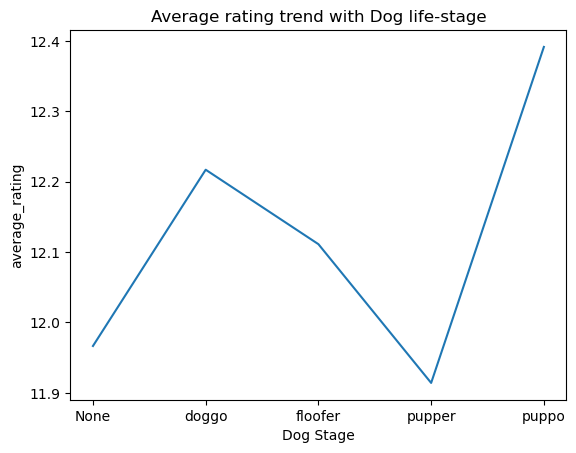

In [306]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(merged_table2[["dog_stage", "rating_numerator"]].groupby("dog_stage").mean())
plt.xlabel('Dog Stage')
plt.ylabel('average_rating')
plt.title('Average rating trend with Dog life-stage')

Puppos receive higher rating on-average than other stage dogs. 

In [307]:
merged_table2.retweet_count.mean() #1st analysis

2841.6676204101095

In [308]:
merged_table2.favorite_count.mean() #2nd analysis

8980.902241297092

In [309]:
merged_table2.describe()

,tweet_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.097000e+03,2097.000000,2097.0,1971.000000,1.971000e+03,1.971000e+03,2097.000000,2097.000000
mean,7.365594e+17,11.976156,10.0,0.594558,1.345850e-01,6.016556e-02,2841.667620,8980.902241
std,6.710178e+16,0.637118,0.0,0.272126,1.010527e-01,5.094156e-02,4709.238203,12199.636684
min,6.660209e+17,11.000000,10.0,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.768197e+17,12.000000,10.0,0.363091,5.339800e-02,1.608055e-02,644.000000,2046.000000
50%,7.098528e+17,12.000000,10.0,0.587764,1.173970e-01,4.944380e-02,1405.000000,4196.000000
75%,7.877176e+17,12.000000,10.0,0.847827,1.955655e-01,9.153815e-02,3285.000000,11416.000000
max,8.924206e+17,14.000000,10.0,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


Text(0.5, 1.0, 'Trend of #Retweets with dog ratings')

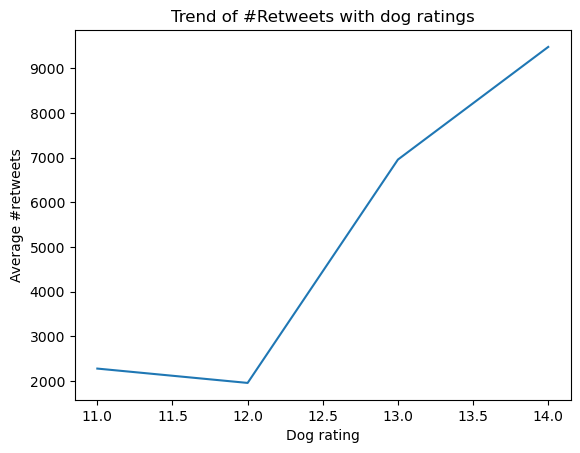

In [310]:
plt.plot(merged_table2[[ "rating_numerator", "retweet_count" ]].groupby("rating_numerator").mean()) 
plt.xlabel('Dog rating')
plt.ylabel('Average #retweets')
plt.title('Trend of #Retweets with dog ratings')
#3rd analysis with visuals

Typically, higher the rating of a dog, greater are the retweets on that tweet. 

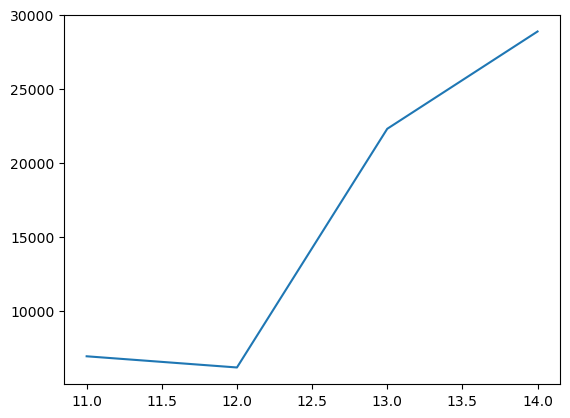

In [311]:
plt.plot(merged_table2[[ "rating_numerator", "favorite_count" ]].groupby("rating_numerator").mean()) 
#3rd analysis with visuals